# Generate plots for Audience Reconstructed paper

Using reduced datasets of tweets, generate all figure files and quantitative data analysis results for the submission, while respecting guidelines: https://www.frontiersin.org/guidelines/author-guidelines#figure-and-table-guidelines

In generating visualisations of these complex datasets, we tried to respect best pracices for accessibility while drawing from the concert colour palettes of the Sowoozoo and Permission to Dance performances. 

In [58]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [59]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Tick

In [60]:
# import respy functions from twt.py file
%load_ext autoreload
%autoreload 1
%aimport twt_red

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
%reload_ext autoreload

In [62]:
raw_dir = '/Users/finn/Desktop/Current_Projects/BTS_twitter/twt_Analysis/'
Concerts = pd.DataFrame(columns=['tag','raw_loc','fullfeilds_loc','dep_loc',
                                 'raw_twt_db','full_twt_db','fan_twt_db','dep_twt_db',
                                 'event_file','event_offset','event_reduction','Long_name','sampling','Program'])
Concerts.loc[0,:]={'tag': 'SWZ_D1','raw_loc':'data/','fullfeilds_loc': '../StreamData/', 'dep_loc':'./data/',
             'raw_twt_db':'Fan_tweets_H_Sowoozoo_D1.csv','full_twt_db':'All_Tweets_SWZ_D1.csv',
             'fan_twt_db':'fan_Tweets_SWZ_D1.csv','dep_twt_db':'fan_Tweets_SWZ_D1_reduced.csv',
             'event_file':'SWZ_D1_setlist.csv',
             'event_offset':'6MIN','event_reduction':[1,2,3,6,8,9,10,12,13,15,16,19,20,21,22,23,25,26,27,28],
             'Long_name':'Sowoozoo Concert Day 1','sampling':'#SOWOOZOO','Program':'SWZ'}
Concerts.loc[1,:]={'tag': 'SWZ_D2','raw_loc':'data/','fullfeilds_loc': '../StreamData/', 'dep_loc':'./data/',
             'raw_twt_db':'Fan_tweets_H_Sowoozoo_D2.csv','full_twt_db':'All_Tweets_SWZ_D2.csv',
             'fan_twt_db':'fan_Tweets_SWZ_D2.csv','dep_twt_db':'fan_Tweets_SWZ_D2_reduced.csv',
             'event_file':'SWZ_D2_setlist.csv',
             'event_offset':'108S','event_reduction':[1,2,3,6,8,9,10,12,13,15,16,19,20,21,22,23,25,26,27,28],
             'Long_name':'Sowoozoo Concert Day 2','sampling':'#SOWOOZOO','Program':'SWZ'}
Concerts.loc[2,:]={'tag': 'PTD_ON','raw_loc':'data/PTD/','fullfeilds_loc': '../StreamData/', 'dep_loc':'./data/',
             'raw_twt_db':'FullPTD_Fan_tweets_PTD_ON_STAGE.csv','full_twt_db':'All_Tweets_PTD_ON.csv',
             'fan_twt_db':'fan_Tweets_PTD_ON.csv','dep_twt_db':'fan_Tweets_PTD_ON_reduced.csv',
             'event_file':'PTD_ON_setlist.csv','event_offset':'25S','event_reduction':[1,2,3,6,7,8,9,11,12,14,15,17,18,21,22,28,29,32,33,34,36,37,38,39],
             'Long_name':'Permission to Dance on Stage','sampling':'Kpop Stream','Program':'PTD'}
Concerts.loc[3,:]={'tag': 'PTD_LA4','raw_loc':'data/PTD/','fullfeilds_loc': '../StreamData/', 'dep_loc':'./data/',
             'raw_twt_db':'PTD_LA4_Fan_tweets_FULLSTREAM.csv','full_twt_db':'All_Tweets_PTD_LA4.csv',
             'fan_twt_db':'fan_Tweets_PTD_LA4.csv','dep_twt_db':'fan_Tweets_PTD_LA4_reduced.csv',
             'event_file':'PTD_LA4_setlist.csv','event_offset':'40S','event_reduction':[1,2,3,6,7,8,9,11,12,14,15,17,18,21,22,28,29,32,33,34,36,37,38,39],
             'Long_name':'Permission to Dance LA Day 4','sampling':'Kpop Stream','Program':'PTD'}
Concerts.loc[4,:]={'tag': 'PTD_ON_Alt1','raw_loc':'data/PTD/','fullfeilds_loc': '../StreamData/', 'dep_loc':'./data/',
             'raw_twt_db':'Alt1PTD_Fan_tweets_PTD_ON_STAGE.csv','full_twt_db':'All_Tweets_PTD_ON_Alt1.csv',
             'fan_twt_db':'fan_Tweets_PTD_ON_Alt1.csv','dep_twt_db':'fan_Tweets_PTD_ON_Alt1_reduced.csv',
             'event_file':'','event_offset':'','event_reduction':[],
             'Long_name':'Week prior to PTD On Stage','sampling':'Kpop Stream','Program':''}
Concerts.loc[5,:]={'tag': 'PTD_ON_Alt2','raw_loc':'data/PTD/','fullfeilds_loc': '../StreamData/', 'dep_loc':'./data/',
             'raw_twt_db':'Alt2PTD_Fan_tweets_PTD_ON_STAGE.csv','full_twt_db':'All_Tweets_PTD_ON_Alt2.csv',
             'fan_twt_db':'fan_Tweets_PTD_ON_Alt2.csv','dep_twt_db':'fan_Tweets_PTD_ON_Alt2_reduced.csv',
             'event_file':'','event_offset':'','event_reduction':[],
             'Long_name':'Week following PTD On Stage','sampling':'Kpop Stream','Program':''}
Concerts

,tag,raw_loc,fullfeilds_loc,dep_loc,raw_twt_db,full_twt_db,fan_twt_db,dep_twt_db,event_file,event_offset,event_reduction,Long_name,sampling,Program
0,SWZ_D1,data/,../StreamData/,./data/,Fan_tweets_H_Sowoozoo_D1.csv,All_Tweets_SWZ_D1.csv,fan_Tweets_SWZ_D1.csv,fan_Tweets_SWZ_D1_reduced.csv,SWZ_D1_setlist.csv,6MIN,"[1, 2, 3, 6, 8, 9, 10, 12, 13, 15, 16, 19, 20,...",Sowoozoo Concert Day 1,#SOWOOZOO,SWZ
1,SWZ_D2,data/,../StreamData/,./data/,Fan_tweets_H_Sowoozoo_D2.csv,All_Tweets_SWZ_D2.csv,fan_Tweets_SWZ_D2.csv,fan_Tweets_SWZ_D2_reduced.csv,SWZ_D2_setlist.csv,108S,"[1, 2, 3, 6, 8, 9, 10, 12, 13, 15, 16, 19, 20,...",Sowoozoo Concert Day 2,#SOWOOZOO,SWZ
2,PTD_ON,data/PTD/,../StreamData/,./data/,FullPTD_Fan_tweets_PTD_ON_STAGE.csv,All_Tweets_PTD_ON.csv,fan_Tweets_PTD_ON.csv,fan_Tweets_PTD_ON_reduced.csv,PTD_ON_setlist.csv,25S,"[1, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 17, 18, ...",Permission to Dance on Stage,Kpop Stream,PTD
3,PTD_LA4,data/PTD/,../StreamData/,./data/,PTD_LA4_Fan_tweets_FULLSTREAM.csv,All_Tweets_PTD_LA4.csv,fan_Tweets_PTD_LA4.csv,fan_Tweets_PTD_LA4_reduced.csv,PTD_LA4_setlist.csv,40S,"[1, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 17, 18, ...",Permission to Dance LA Day 4,Kpop Stream,PTD
4,PTD_ON_Alt1,data/PTD/,../StreamData/,./data/,Alt1PTD_Fan_tweets_PTD_ON_STAGE.csv,All_Tweets_PTD_ON_Alt1.csv,fan_Tweets_PTD_ON_Alt1.csv,fan_Tweets_PTD_ON_Alt1_reduced.csv,,,[],Week prior to PTD On Stage,Kpop Stream,
5,PTD_ON_Alt2,data/PTD/,../StreamData/,./data/,Alt2PTD_Fan_tweets_PTD_ON_STAGE.csv,All_Tweets_PTD_ON_Alt2.csv,fan_Tweets_PTD_ON_Alt2.csv,fan_Tweets_PTD_ON_Alt2_reduced.csv,,,[],Week following PTD On Stage,Kpop Stream,


## Plot 1: Tweet rates by type during Sowoozoo
This needs to include the timing information of the pieces with xtick labels that are short and printiblae by the figure dimensions defined


In [101]:
i = 0
df_alltwt=pd.read_csv(Concerts.loc[i,'dep_loc'] + Concerts.loc[i,'dep_twt_db'],index_col = 0)
df_alltwt["created_at"] = pd.to_datetime(df_alltwt["created_at"])
data_name = Concerts.loc[i,'tag']
print('Size of cleaned set: ' + str(len(df_alltwt)))
print(df_alltwt.columns)

Size of cleaned set: 224733
Index(['created_at', 'id', 'user_id', 'user_followers_count',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_user_followers_count',
       'retweeted_status_retweet_count', 'retweeted_status_favorite_count',
       'retweeted_status_reply_count', 'quoted_status_id',
       'quoted_status_user_id', 'quoted_status_user_followers_count',
       'quoted_status_retweet_count', 'quoted_status_favorite_count',
       'quoted_status_reply_count', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'Original', 'RT', 'QT', 'Reply', 'Media',
       'Length'],
      dtype='object')


In [102]:
df_alltwt.loc[:5,:]

,created_at,id,user_id,user_followers_count,retweeted_status_id,retweeted_status_user_id,retweeted_status_user_followers_count,retweeted_status_retweet_count,retweeted_status_favorite_count,retweeted_status_reply_count,...,quoted_status_favorite_count,quoted_status_reply_count,in_reply_to_status_id,in_reply_to_user_id,Original,RT,QT,Reply,Media,Length
0,2021-06-13 09:00:00+00:00,155098,24414,16,48.0,33651.0,717.0,507.0,105.0,1.0,...,NaN,NaN,NaN,NaN,0,1,0,0,0,214
1,2021-06-13 09:00:00+00:00,155099,76643,202,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,1,60
2,2021-06-13 09:00:00+00:00,155019,17351,402,19.0,2572.0,23.0,581.0,67.0,2.0,...,NaN,NaN,NaN,NaN,0,1,0,0,0,232
3,2021-06-13 09:00:00+00:00,155047,158,80038,NaN,NaN,NaN,NaN,NaN,NaN,...,235.0,6.0,NaN,NaN,0,0,1,0,1,642
4,2021-06-13 09:00:00+00:00,155018,6338,195,55.0,53.0,1347.0,1347.0,496.0,1.0,...,NaN,NaN,NaN,NaN,0,1,0,0,1,240
5,2021-06-13 09:00:00+00:00,155100,83000,264,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,1,224


In [103]:
concert_times=pd.read_csv(Concerts.loc[i,'dep_loc'] + Concerts.loc[i,'event_file'])
concert_times["starttime"] = pd.to_datetime(concert_times["starttime"])+pd.Timedelta(Concerts.loc[i,'event_offset']) # added 6 minutes, so songs begin less than a minute before the first yell tweet of recognition
concert_times=concert_times.set_index("starttime", drop=True)

# define date range
time_start = concert_times.index[0]
time_end = concert_times.index[-1]
print([time_start,time_end])

concert_times

[Timestamp('2021-06-13 09:16:00+0000', tz='UTC'), Timestamp('2021-06-13 11:58:46+0000', tz='UTC')]


,order,event,event_type,rank
starttime,,,,
2021-06-13 09:16:00+00:00,0,Before,Not Stage,1
2021-06-13 09:31:00+00:00,1,Pre-stream,Not Stage,0
2021-06-13 09:37:25+00:00,2,VCR1,VCR,1
2021-06-13 09:40:12+00:00,3,Life goes on,Live Music,1
2021-06-13 09:43:30+00:00,4,Butter,Live Music,0
2021-06-13 09:46:19+00:00,5,Dynamite,Live Music,0
2021-06-13 09:49:35+00:00,6,Live 1,Live Talk,1
2021-06-13 09:56:55+00:00,7,ARMY signals,Live Talk,1
2021-06-13 10:04:52+00:00,8,Moving On,Live Music,1


In [104]:
df_RT = df_alltwt.loc[df_alltwt['RT']==1,:].reset_index()
df_Ori = df_alltwt.loc[df_alltwt['Original'] ==1,:].reset_index()
print([len(df_RT),len(df_Ori)])

[190998, 26939]


In [105]:
df_set = df_RT
sr = '15S'
timestamps_ind = pd.date_range(time_start,time_end, freq=sr)
sort_field = 'retweeted_status_id'
count_field = 'retweeted_status_favorite_count'

top_number = 1000
Feild_sorted = df_set[sort_field].value_counts()
ID_Field = sort_field

df_TS = pd.DataFrame(index = timestamps_ind)
df_TS1 = pd.DataFrame(index = timestamps_ind)
df_TS2 = pd.DataFrame(index = timestamps_ind)
df_TS3 = pd.DataFrame(index = timestamps_ind)

for i in range(top_number):
    ID_value = Feild_sorted.index[i]
    Stats_accumulated = twt_red.Streamed_Set_Stats_Accumulated(df_set,ID_Field,ID_value)
    A = Stats_accumulated[~Stats_accumulated.index.duplicated(keep='last')]
    df_reindexed = A.reindex(timestamps_ind) 
    df_reindexed.interpolate(method='linear',inplace = True)
    df_TS[i] = df_reindexed[count_field]
    df_TS1[i] = df_reindexed['retweeted_status_retweet_count']
    df_TS3[i] = df_reindexed['Exposures']

df_S_Acc = pd.DataFrame(index = timestamps_ind)
df_S_Acc['Likes*'] = df_TS.diff().rolling(4).sum().sum(axis = 1)
#df_S_Acc['Retweets rate*'] = df_TS1.diff().rolling(4).sum().sum(axis = 1)
df_S_Acc['Exposure*'] = df_TS3.diff().rolling(4).sum().sum(axis = 1)
df_counted = twt_red.ind_set_counts(df_Ori,'created_at',timestamps_ind)
df_S_Acc['Originals'] = df_counted['Counts'].rolling(4).sum().values
df_counted = twt_red.ind_set_counts(df_RT,'created_at',timestamps_ind)
df_S_Acc['Retweets'] = df_counted['Counts'].rolling(4).sum().values


df_Shouts = df_Ori.loc[df_Ori['Media']==0,:]
df_Shouts = df_Shouts.loc[df_Shouts['Length']<70,:]
df_counted = twt_red.ind_set_counts(df_Shouts,'created_at',timestamps_ind)
df_S_Acc['Shouts rate'] = df_counted['Counts'].rolling(4).sum().values

In [106]:
cp = {"Not Stage":(0.954,0.97,0.993),"Music":(0.875,0.82,0.99),"Talking":(0.98,0.888,0.927),"VCR":(0.80,0.95,0.96), 
                  "RT": (0.345,0.616,0.463), "Ori": (0.16,0,0.38),"Inter":(0.78,0.29,0.21),"Shout":(0.01,0.17,0),
                  "Fav":(0.8,0.42,0.61),"Follows":(0.8,0.64,0.1)}

# https://matplotlib.org/stable/tutorials/colors/colors.html

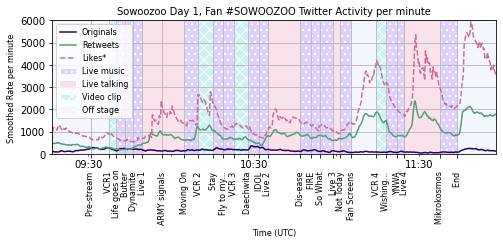

In [107]:
fig, ax = plt.subplots(figsize=(7.08661,3.5),tight_layout = True)
# ax.set_layout_engine(layout='tight')
yrange = [0,6000]
xrange = [time_start+pd.to_timedelta(60,'s'),time_end-pd.to_timedelta(60,'s')]
# c = ['Favorites rate*', 'Retweets rate*', 'Follows rate*', 'Exposure rate*','Original Tweet rate']
c = ['Originals','Retweets','Favorites*']
df_S_Acc['Originals'].plot(ax=ax,linewidth=1.5,color = cp["Ori"])
df_S_Acc['Retweets'].plot(ax=ax,linewidth=1.5,color = cp["RT"])
df_S_Acc['Likes*'].plot(ax=ax,linewidth=1.5,color = cp["Fav"],linestyle = '--')

ax.grid()
ax.set_title('Sowoozoo Day 1, Fan #SOWOOZOO Twitter Activity per minute',fontsize = 10)
ax.set_xlabel('Time (UTC)',fontsize = 8)
ax.set_ylabel('Smoothed Rate per minute',fontsize = 8)
ax.set_ylim(yrange)
ax.set_xticks(concert_times.index)
ax.set_xlim(xrange)
ax.set_xticklabels(concert_times['event'],rotation=90,fontsize = 8)

ax.margins(0)
ax.axvspan(time_start,xrange[0],0,1, facecolor=cp["Music"],label="Live music",hatch = '..',edgecolor="w",)
ax.axvspan(time_start,xrange[0],0,1, facecolor=cp["Talking"],label="Live talking")
ax.axvspan(time_start,xrange[0],0,1, facecolor=cp["VCR"],label="Video clip",hatch = 'xx',edgecolor="w",)
ax.axvspan(time_start,xrange[0],0,1, facecolor=cp["Not Stage"],label="Off stage")
ax.legend(fontsize = 8)

for i in range(len(concert_times)-1):
    r= concert_times.iloc[i,:]
    ei = r.name
    ej = concert_times.index[i+1]
    if r['event_type'].startswith('Not'):
        ax.axvspan(ei, ej,yrange[0],yrange[1], facecolor=cp["Not Stage"])
    if r['event_type'].endswith('Music'):
        ax.axvspan(ei, ej,yrange[0],yrange[1], facecolor=cp["Music"],hatch = '..',edgecolor="w",)
    if r['event_type'].endswith('Talk'):
        ax.axvspan(ei, ej,yrange[0],yrange[1], facecolor=cp["Talking"])
    if r['event_type'].startswith('VCR'):
        ax.axvspan(ei, ej,yrange[0],yrange[1], facecolor=cp["VCR"],hatch = 'xx',edgecolor="w",)
    
plt.savefig('./plots/figure1_Interactions_' + data_name + '.jpg',bbox_inches = 'tight',dpi = 300) #transparent=False, backend = 'PS',
plt.show()

In [108]:
# remove counting artifact before correlating
df_S_Acc.iloc[4:-1,:].corr()

,Likes*,Exposure*,Originals,Retweets,Shouts rate
Likes*,1.000000,0.736357,-0.308263,0.949046,-0.382982
Exposure*,0.736357,1.000000,-0.259178,0.740402,-0.278593
Originals,-0.308263,-0.259178,1.000000,-0.364030,0.915791
Retweets,0.949046,0.740402,-0.364030,1.000000,-0.427010
Shouts rate,-0.382982,-0.278593,0.915791,-0.427010,1.000000


In [109]:
# shout tweets
# no media and under 70 characters (allowing for hashtag)
sr = '15S'
timestamps_ind = pd.date_range(time_start,time_end, freq=sr)
df_new = pd.DataFrame(index = timestamps_ind)

df_counted = twt_red.ind_set_counts(df_Ori,'created_at',timestamps_ind)
df_new['Originals'] = df_counted['Counts'].values

df_Shouts = df_Ori.loc[df_Ori['Media']==0,:]
df_Shouts = df_Shouts.loc[df_Shouts['Length']<60,:].copy() # 60 in text and in coding
df_counted = twt_red.ind_set_counts(df_Shouts,'created_at',timestamps_ind)
df_new['Shouts'] = df_counted['Counts'].values
df_new['Remaining Originals'] = df_new['Originals'] -df_new['Shouts'] 

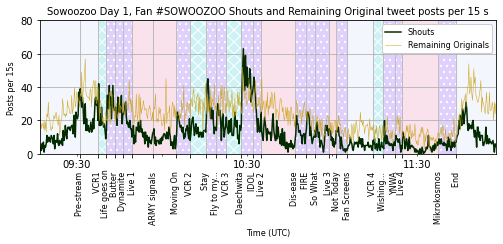

In [110]:
fig, ax = plt.subplots(figsize=(7.08661,3.5),tight_layout = True)
# ax.set_layout_engine(layout='tight')
yrange = [0,80]
xrange = [time_start+pd.to_timedelta(60,'s'),time_end-pd.to_timedelta(60,'s')]
# c = ['Favorites rate*', 'Retweets rate*', 'Follows rate*', 'Exposure rate*','Original Tweet rate']
c = ['Originals','Retweets','Favorites*']
#df_new['Original tweets'].plot(ax=ax,linewidth=0.5,color = cp["Ori"])
df_new['Shouts'].plot(ax=ax,linewidth=1.5,color = cp["Shout"])
df_new['Remaining Originals'].plot(ax=ax,linewidth=0.5,color = cp["Follows"])

ax.legend(loc='upper right',bbox_to_anchor=(1,1),framealpha =1,fontsize = 8)

ax.grid()
ax.set_title('Sowoozoo Day 1, Fan #SOWOOZOO Shouts and Remaining Original tweet posts per 15 s',fontsize = 10)
ax.set_xlabel('Time (UTC)',fontsize = 8)
ax.set_ylabel('Posts per 15s',fontsize = 8)
ax.set_ylim(yrange)
ax.set_xticks(concert_times.index)
ax.set_xlim(xrange)
ax.set_xticklabels(concert_times['event'],rotation=90,fontsize = 8)

ax.margins(0)
ax.axvspan(time_start,xrange[0],0,1, facecolor=cp["Music"],label="Live music")
ax.axvspan(time_start,xrange[0],0,1, facecolor=cp["Talking"],label="Live talking")
ax.axvspan(time_start,xrange[0],0,1, facecolor=cp["VCR"],label="Video clip")
ax.axvspan(time_start,xrange[0],0,1, facecolor=cp["Not Stage"],label="Off stage")
#ax.legend(fontsize = 8,loc='best') # bbox_to_anchor=(1,1),framealpha =1

for i in range(len(concert_times)-1):
    r= concert_times.iloc[i,:]
    ei = r.name
    ej = concert_times.index[i+1]
    if r['event_type'].startswith('Not'):
        ax.axvspan(ei, ej,yrange[0],yrange[1], facecolor=cp["Not Stage"])
    if r['event_type'].endswith('Music'):
        ax.axvspan(ei, ej,yrange[0],yrange[1], facecolor=cp["Music"],hatch = '..',edgecolor="w",)
    if r['event_type'].endswith('Talk'):
        ax.axvspan(ei, ej,yrange[0],yrange[1], facecolor=cp["Talking"])
    if r['event_type'].startswith('VCR'):
        ax.axvspan(ei, ej,yrange[0],yrange[1], facecolor=cp["VCR"],hatch = 'xx',edgecolor="w",)

plt.savefig('./plots/figure5_OriShout_' + data_name + '.jpg',bbox_inches = 'tight',dpi = 300)#transparent=False, backend = 'PS',
plt.show()

## Top retweets plot, to show balance of prominence

In [111]:
sort_field = 'retweeted_status_id'
top_number = 7
df_set = df_RT.loc[df_RT['created_at']<time_end,:].copy()

Feild_sorted = df_set[sort_field].value_counts()
feild_sets = []
# initialise
i = 0
a = df_set.loc[df_set['retweeted_status_id']==Feild_sorted.index[i],:].index
feild_sets.append(df_set.loc[df_set['retweeted_status_id']==Feild_sorted.index[i],:].reset_index(drop=True))
    
for i in range(1,top_number):
    a = a.append(df_set.loc[df_set['retweeted_status_id']==Feild_sorted.index[i],:].index)
    feild_sets.append(df_set.loc[df_set['retweeted_status_id']==Feild_sorted.index[i],:].reset_index(drop=True))

feild_sets.append(df_set.loc[set(df_set.index)-set(a)])

In [112]:
#[time_start,time_end]
dts = pd.date_range(time_start,time_end, freq='1Min')
df_time_counts = pd.DataFrame(index = dts)

for i in range(top_number):
    df_set = feild_sets[i]
    df_counted = twt_red.ind_set_counts(df_set,'created_at',dts)
    col_name = str(i+1) + ' (' + str(df_counted.iloc[:-2,:].sum().values[0]) + ' RTs)'
    df_time_counts[col_name] = df_counted['Counts'].values 

df_set = feild_sets[i+1]
df_counted = twt_red.ind_set_counts(df_set,'created_at',dts)
df_time_counts['Remaining RTs'] = df_counted['Counts'].values 

In [113]:
Alt = df_time_counts.cumsum(axis=1)
Alt

,1 (22684 RTs),2 (5109 RTs),3 (3656 RTs),4 (3374 RTs),5 (2326 RTs),6 (2191 RTs),7 (1491 RTs),Remaining RTs
2021-06-13 09:16:00+00:00,0,0,0,0,0,0,31,464
2021-06-13 09:17:00+00:00,0,0,0,0,0,0,35,464
2021-06-13 09:18:00+00:00,0,0,0,0,0,0,26,509
2021-06-13 09:19:00+00:00,0,0,0,0,0,0,35,466
2021-06-13 09:20:00+00:00,0,0,0,0,0,0,44,432
...,...,...,...,...,...,...,...,...
2021-06-13 11:54:00+00:00,387,399,406,411,511,580,587,1700
2021-06-13 11:55:00+00:00,388,409,420,435,558,637,638,1765
2021-06-13 11:56:00+00:00,328,342,347,357,457,533,540,1693
2021-06-13 11:57:00+00:00,332,348,355,362,448,507,514,1785


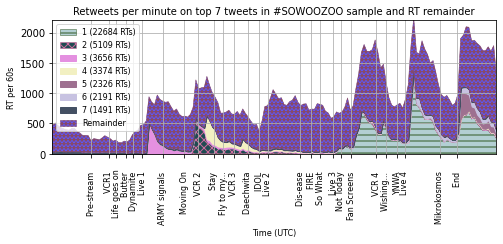

In [114]:
fig, ax = plt.subplots(figsize=(7.08661,3.5),tight_layout = True,)

cp2 = [(0.122,0.294,0.322),(0.894,0.565,0.878),(0.949,0.941,0.761),(0.619,0.439,0.565),
       (0.780,0.761,0.883),(0.266,0.314,0.388),(0.835,0.859,0.643),(0.926,0.851,0.933),]
#        
#        ,
cols = Alt.columns
patterns = [".",  "/" , "\\" , "-" , "+" , "x","o","*",]

k = 0
ax.fill_between(dts, Alt[cols[0]],color=(0.702,0.812,0.828),hatch = '--',edgecolor=(0.204,0.361,0.161),linewidth = 0.5,label=cols[0])#,zorder=k) hatch = patterns[0],edgecolor="b",
k+=1
ax.fill_between(dts, Alt[cols[0]], Alt[cols[1]],color=cp2[0],hatch = 'xxx',edgecolor=(0.8,0.42,0.61),linewidth = 0.5,label=cols[1]) #,zorder=k hatch = patterns[i+1],edgecolor="b",
k+=1

# for i in range(8):
for i in range(1,len(Alt.columns)-2): 
    ax.fill_between(dts, Alt[cols[i]], Alt[cols[i+1]],color=cp2[i],label=cols[i+1]) #,zorder=k hatch = patterns[i+1],edgecolor="b",
    k+=1
#df_time_counts.plot.area(ax=ax,legend=False,color=cp2)
ax.fill_between(dts, Alt[cols[top_number-1]], Alt['Remaining RTs'],color=(0.369,0.341,0.965),hatch = '***',edgecolor=(0.529,0.286,0.412),linewidth = 0.5,label='Remainder')#,color=(0.926,0.851,0.933))
k+=1

xrange = [time_start+pd.to_timedelta(60,'s'),time_end-pd.to_timedelta(60,'s')]
ax.set_title('Retweets per minute on top 7 tweets in #SOWOOZOO sample and RT remainder',fontsize = 10)
ax.set_xlabel('Time (UTC)',fontsize = 8)
ax.set_ylabel('RT per 60s',fontsize = 8)
ax.set_xticks(concert_times.index)
ax.set_xlim(xrange)
ax.set_ylim([0,2200])
ax.set_xticklabels(concert_times['event'],rotation=90,fontsize = 8)
ax.legend(fontsize = 8,loc='upper left')
ax.grid()

plt.savefig('./plots/figure2_RTwaves_' + data_name + '.jpg',bbox_inches = 'tight',dpi = 300) # ,transparent=False, backend = 'PS'
plt.show()

## Bar graphs of rate changes

In [115]:
users = list(df_alltwt['retweeted_status_user_id'].unique()) + list(df_alltwt['user_id'].unique())
myset = set(users)
print([len(myset),len(users)])

[111147, 112969]


In [116]:
Event_wise_stats = pd.DataFrame()
Segment_wise_stats = pd.DataFrame()
sr = '15S'
sm = '15S'

for setNo in range(4):
    cdets = Concerts.loc[setNo,:]
    
    df_alltwt["created_at"] = pd.to_datetime(df_alltwt["created_at"])
    print(cdets['tag'])

    twt_set = pd.read_csv(cdets['dep_loc'] + cdets['dep_twt_db'],index_col = 0)
    twt_set["created_at"] = pd.to_datetime(twt_set["created_at"])

    
    df_Ori = twt_set.loc[twt_set['Original']==1,:].reset_index(drop=True)   
    df_RT =twt_set.loc[twt_set['RT']==1,:].reset_index(drop=True)  
    df_replys = twt_set.loc[twt_set['Reply']==1,:].reset_index(drop=True)
    df_QT = twt_set.loc[twt_set['QT']==1,:].reset_index(drop=True)
    df_inter = pd.concat([df_replys,df_QT]).sort_values('created_at').reset_index(drop=True)
    df_Shouts = df_Ori.loc[df_Ori['Media']==0,:]
    df_Shouts = df_Shouts.loc[df_Shouts['Length']<60,:].copy().reset_index(drop=True)
    
    df_alltwt_ord = twt_set.copy()
    set_size = len(df_alltwt_ord)
    users = list(df_alltwt_ord['retweeted_status_user_id'].unique()) + list(df_alltwt_ord['user_id'].unique())
    myset = set(users)
    print('Full set: ' + str(set_size) + ' tweets by ' +  str(len(df_alltwt_ord['user_id'].unique())) + ' users (' + str(len(myset)) + ' with RTed)' )

    print('Number of retweeting tweets in set: ' + str(len(df_RT))  + ' (' + str(np.round(len(df_RT)/set_size,3)) + ')')
    print('    Retweeting ' + str(len(df_RT['retweeted_status_id'].unique())) + ' tweets')

    print('Number of reply tweets in set: ' + str(len(df_replys))  + ' (' + str(np.round(len(df_replys)/set_size,3)) + ')')
    print('    Replying to ' + str(len(df_replys['in_reply_to_user_id'].unique())) + ' tweets')

    print('Number of quote tweeting tweets in set: ' + str(len(df_QT)) + ' (' + str(np.round(len(df_QT)/set_size,3)) + ')')
    print('    Quoting ' + str(len(df_QT["quoted_status_id"].unique())) + ' tweets')
    
    print('Number of interaction tweets in set: ' + str(len(pd.concat([df_replys,df_QT]).id.unique())))

    print('Number of Original tweets in set: ' + str(len(df_Ori)) + ' (' + str(np.round(len(df_Ori)/set_size,3)) + ')')
    print('    by ' +  str(len(df_Ori["user_id"].unique())) + ' users')


    twt_rates = twt_red.tweet_rates(twt_set,sr,sm)
    concert_times = twt_red.cevents(cdets)
    
    ct = twt_red.segment_rates(concert_times,twt_set,twt_rates)
    ct['sampling'] = cdets['sampling']
    ct['tag'] = cdets['tag']
    Event_wise_stats= pd.concat([Event_wise_stats,ct])
    
    ct = twt_red.segment_rates(concert_times.iloc[cdets['event_reduction'],:],twt_set,twt_rates)
    ct['sampling'] = cdets['sampling']
    ct['tag'] = cdets['tag']
    Segment_wise_stats = pd.concat([Segment_wise_stats,ct])

# 222405 $ 26942 & 8619 & 188818 & 6003 & 108814
# 111129 & 18816 & 4215 & 89129 & 5449 & 53342

SWZ_D1
Full set: 224733 tweets by 110075 users (111147 with RTed)
Number of retweeting tweets in set: 190998 (0.85)
    Retweeting 6006 tweets
Number of reply tweets in set: 1321 (0.006)
    Replying to 563 tweets
Number of quote tweeting tweets in set: 7301 (0.032)
    Quoting 1607 tweets
Number of interaction tweets in set: 8459
Number of Original tweets in set: 26939 (0.12)
    by 11978 users
[Timestamp('2021-06-13 09:00:00+0000', tz='UTC'), Timestamp('2021-06-13 12:29:59+0000', tz='UTC')]
[224733, 190998, 26939]
[224733, 190998, 26939]
SWZ_D2
Full set: 111185 tweets by 53376 users (54457 with RTed)
Number of retweeting tweets in set: 89151 (0.802)
    Retweeting 5451 tweets
Number of reply tweets in set: 911 (0.008)
    Replying to 441 tweets
Number of quote tweeting tweets in set: 3309 (0.03)
    Quoting 1301 tweets
Number of interaction tweets in set: 4093
Number of Original tweets in set: 18816 (0.169)
    by 8662 users
[Timestamp('2021-06-14 09:00:00+0000', tz='UTC'), Timestamp

In [117]:
120/143

0.8391608391608392

Model in the sample method?

In [118]:
my_colors=[np.array([0.875,0.82,0.99])**2,np.array([0.98,0.888,0.927])**2,np.array([0.80,0.95,0.96])**2,np.array([0.954,0.97,0.993])**2] 
my_colors

[array([0.765625, 0.6724  , 0.9801  ]),
 array([0.9604  , 0.788544, 0.859329]),
 array([0.64  , 0.9025, 0.9216]),
 array([0.910116, 0.9409  , 0.986049])]



Retweet Rate Shift medians:
Video clip: 1.121836215785199
Live music: 0.8330769884296221
Live talking: 1.0559520862088188
Off stage: 1.8922262946563346


       Source  ddof1      ddof2         F     p-unc       np2
0  event_type      3  27.981674  5.616071  0.003826  0.131254


              A             B  mean(A)  mean(B)   diff     se      T      df  \
0    Live music  Live talking    1.060    1.246 -0.185  0.186 -0.998  43.717   
1    Live music     Off stage    1.060    1.977 -0.917  0.221 -4.141  14.855   
2    Live music    Video clip    1.060    1.285 -0.225  0.213 -1.057  35.744   
3  Live talking     Off stage    1.246    1.977 -0.732  0.226 -3.235  15.044   
4  Live talking    Video clip    1.246    1.285 -0.040  0.218 -0.182  32.314   
5     Off stage    Video clip    1.977    1.285  0.692  0.249  2.779  18.820   

    pval  hedges  
0  0.751  -0.258  
1  0.004  -1.239  
2  0.718  -0.295  
3  0.025  -1.273  
4  0.998  -0.059  
5  0.054   1.001  


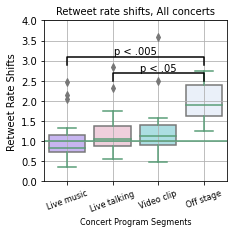

In [119]:
seg_stats = Segment_wise_stats.copy()
seg_stats.loc[seg_stats['event_type']=="Not Stage",'event_type'] = 'Off stage'
seg_stats.loc[seg_stats['event_type']=="VCR",'event_type'] = 'Video clip'
seg_stats.loc[seg_stats['event_type']=="Live Music",'event_type'] = 'Live music'
seg_stats.loc[seg_stats['event_type']=="Live Talk",'event_type'] = 'Live talking'

seg_stats.columns

ct = seg_stats#.loc[Segment_wise_stats['sampling']=='#SOWOOZOO',:]
col = 'Retweet Rate Shift'
data_name = 'All_Concerts'

d = seg_stats['event_type'].unique()
aov=pg.welch_anova(data=ct, dv=col, between = 'event_type')
# https://pingouin-stats.org/build/html/generated/pingouin.welch_anova.html#pingouin.welch_anova
     
print('\n\n' + col + ' medians:')
for e in d:
    print(e + ': ' + str(ct.loc[ct['event_type']==e,col].median()))
print('\n')
print(aov)
print('\n')
if aov.loc[0,'p-unc']<0.05:
    pt = pg.pairwise_gameshowell(data=ct, dv=col,
                    between='event_type').round(3)
    print(pt)

fig, ax = plt.subplots(figsize=(3.34646,3.34646),tight_layout = True)
#my_colors=[(0.875,0.82,0.99),(0.98,0.888,0.927),(0.80,0.95,0.96),(0.954,0.97,0.993)] 
sns.set_palette( my_colors )
sns.boxplot(y=col, x='event_type', data=ct,order=['Live music', 'Live talking', 'Video clip','Off stage'], ax = ax) #violinplot 
plt.xlabel('Concert Program Segments',fontsize = 8)
ax.set_xticklabels(['Live music', 'Live talking','Video clip','Off stage'],rotation=20,fontsize = 8)
plt.plot([-1,4],[1,1],color='k')
plt.xlim([-0.5,3.5])
plt.ylim([0,4])
plt.ylabel(col + 's')
plt.setp(ax.lines, color=cp['RT'])
twt_red.barplot_annotate_brackets(0, 3, 'p < .005',[0,1,2,3], [1,2,2.7,2.7], yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None)
twt_red.barplot_annotate_brackets(1, 3, 'p < .05',[0,1,2,3], [1.5,2,2.3,2.3], yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None)

plt.title('Retweet rate shifts, All concerts',fontsize = 10)
plt.grid()
plt.savefig('./plots/figure3_RTshift' + data_name + '.jpg',bbox_inches = 'tight',dpi = 300)#,transparent=False, backend = 'PS',
plt.show()

The amount of twitter activity captured on these samplings are not a stable measure of audience attention. Total participation at one moment or the next could be the results of a change in who is using the platfrom as much as a change in behaviour by individual users in response to contrasts in stream content. To reduce this complication, we side step the issue of modeling the specific rate of posting activity by focusing on the relative rate: what is the ratio of posting activity in one segment relative to its predecessor. This temporally local  descriptor of posting activity has a better chance of capturing changes of behaviour within a population of twitter users to the stream content, even if that population changes in the long run.

Between segments of contrasting content from all four concert streams, Live music segments usually have lower retweet rates than whatever preceeded it, distributions shown in figure 3. Pairwise testing after the repeated measures ANOVA finds Live music rate shifts significantly contasting with Live talking and Off stage segments. Across concerts these tend to have higher retweet rates than their preceeding segment.

While there may be circumstances within individual performances that contrast with this pattern, the trend suggests that online audience members are paying less attention to their timelines (a necessary recursor to retweeting) while BTS is performing on stage.



Original Rate Cusp medians:
Off stage: 1.2232142857142856
Video clip: 1.0588042588042588
Live music: 1.3252032520325203
Live talking: 0.9108515372168284


       Source  ddof1      ddof2         F     p-unc      np2
0  event_type      3  35.091724  9.988744  0.000067  0.05921


              A             B  mean(A)  mean(B)   diff     se      T      df  \
0    Live music  Live talking    1.546    0.950  0.596  0.126  4.726  95.046   
1    Live music     Off stage    1.546    1.441  0.106  0.212  0.497  22.414   
2    Live music    Video clip    1.546    1.268  0.279  0.162  1.715  60.191   
3  Live talking     Off stage    0.950    1.441 -0.491  0.182 -2.695  12.410   
4  Live talking    Video clip    0.950    1.268 -0.318  0.120 -2.647  22.328   
5     Off stage    Video clip    1.441    1.268  0.173  0.209  0.828  19.518   

    pval  hedges  
0  0.000   0.621  
1  0.959   0.103  
2  0.325   0.282  
3  0.078  -1.188  
4  0.065  -0.874  
5  0.841   0.316  


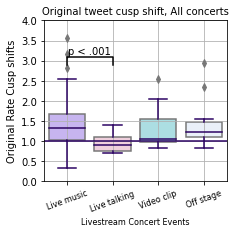

In [120]:
seg_stats = Event_wise_stats.copy()
seg_stats.loc[seg_stats['event_type']=="Not Stage",'event_type'] = 'Off stage'
seg_stats.loc[seg_stats['event_type']=="VCR",'event_type'] = 'Video clip'
seg_stats.loc[seg_stats['event_type']=="Live Music",'event_type'] = 'Live music'
seg_stats.loc[seg_stats['event_type']=="Live Talk",'event_type'] = 'Live talking'

seg_stats.columns

ct = seg_stats#.loc[Segment_wise_stats['sampling']=='#SOWOOZOO',:]
col = 'Original Rate Cusp'
data_name = 'All_Concerts'
d = seg_stats['event_type'].unique()
aov=pg.welch_anova(data=ct, dv=col, between = 'event_type')
# https://pingouin-stats.org/build/html/generated/pingouin.welch_anova.html#pingouin.welch_anova
     
print('\n\n' + col + ' medians:')
for e in d:
    print(e + ': ' + str(ct.loc[ct['event_type']==e,col].median()))
print('\n')
print(aov)
print('\n')
if aov.loc[0,'p-unc']<0.05:
    pt = pg.pairwise_gameshowell(data=ct, dv=col,
                    between='event_type').round(3)
    print(pt)

fig, ax = plt.subplots(figsize=(3.34646,3.34646),tight_layout = True)
#my_colors=[(0.875,0.82,0.99),(0.98,0.888,0.927),(0.80,0.95,0.96),(0.954,0.97,0.993)] 
sns.set_palette( my_colors )
sns.boxplot(y=col, x='event_type', data=ct,order=['Live music', 'Live talking', 'Video clip','Off stage'], ax = ax) #violinplot 
plt.xlabel('Livestream Concert Events',fontsize = 8)
ax.set_xticklabels(['Live music', 'Live talking','Video clip','Off stage'],rotation=20,fontsize = 8)
plt.plot([-1,4],[1,1],color='k')
plt.xlim([-0.5,3.5])
plt.ylim([0,4])
plt.ylabel(col + ' shifts')
plt.setp(ax.lines, color=cp["Ori"])
twt_red.barplot_annotate_brackets(0, 1, 'p < .001',[0,1,2,3], [2.7,2.7,2.7,2.7], yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None)

plt.title('Original tweet cusp shift, All concerts',fontsize = 10)
plt.grid()
plt.savefig('./plots/figure4_EVENTOriCusp_' + data_name + '.jpg',bbox_inches = 'tight',dpi = 300) # ,transparent=False, backend = 'PS'
plt.show()

The posting of original tweets does not quite follow the same timeline as retweets. In that first Sowoozoo concert, the original tweet rate time series was negatively correlated with the retweet rate (r = -0.36). Samples in later concerts are not quite as contrasting, but they continue to support the idea that original tweet timing is independent of the factors defining users retweet patterns during livestreamed concerts. Shout tweets in particular seem to spike at the beginings of songs but this rate is not sustained. To test for these local bursts of original tweet activity, we calculated the change of original tweet rates at the cusp of contrasting segments: the number of original tweets in the minute before a change of content type compared to the number in the minute following. This cusp shift metric captures a significant pattern across the four concerts again, with the start of Live music contrasting with the start Live talking segments that often start with a decrease in original tweets. Figure 4 shows the distributions per Livestream content type again.  

These effects are not very strong, social media data is sensitive many kinds of external factors as well as network quirks. This pattern is not visible without first filterning out tweets and retweets of giant accounts. These datasets are not ideal for capturing network properties, the concentration of content generation changes the dynamics of visibility that might show up on slower or longer sampling intervals, but the concentration of retweets around specific tides within these data sets suggests there is a lot of centrality shaping what people see in their timelines, whether or not they also opt to share. 

The fact that two distinct patterns of stream-content related posting behaviour show up across the hashtag-sampled tweets and the stream-sampled tweets is extremely encouraging. 

However, more information about what is being posted would help explain why these patterns have emmerged.

# Tweet content analysis

This section plots the results of the subsample content analysis per popularity tier. The analysis was performed in google docs spreadsheets, with stats exported to csv and ploted here.

The plots here should highlight differences between the tweets caught by each sampling method as well show trends in what material is popular to share (high RT) and to post (the rest) about these performances.


The tweet subsets were sampled in notebooks: Sampling_PTD_core_stream.ipynb and Sampling_SWZ_tweet_themes.ipynb

The PTD set was resampled with narrow retweets criteria, only including material from tweets started within the measurement intervals (min status id). This helped filter out some of the noise of unrelated content, although the effect was not as strong as we might have hoped. Since this data sets wasn't capturing all the retweets of hashtagged tweets, the ordering criteria was from the last rt count status per retweeted_id. These carry overs don't over polute the rt counts from the previous analysis but they do sneak in the high end samples of this set. (Also the RT counts over time still reflect the attentional behaviour of the streamed population of users, so taking them out actually interferes with that analysis.)

Last point on the analysis for PTD: Stats are on 100 concert related tweets. Each sample included a handful (5-18 of the initial 100) that weren't about the show or BTS, and these were replaced for the numbers counts. Another handful of tweets had dissapeared in the time since collection and thuse did not have varifyable media content.  

SWZ was only filtered of big official accounts before retweets were ordered and sampled. Hashtagged data requires a lot less curation.

## differences by sample
in tweets length
in commentary on members
in commentary period


## differences by popularity

More popular is less personal, more embedded content, more novel information

Differences by source

In [30]:
data_dir = './data/'
coded_twts = pd.concat([pd.read_csv(data_dir+'SWZ_D1_coded_subsets.csv',index_col=0),pd.read_csv(data_dir+'PTD_ON1_coded_subsets.csv',index_col=0)]).reset_index(drop=True)
print(coded_twts.columns)
coded_twts

Index(['RT_SubSet', 'Concert', 'Last_RT_created_at', 'Last_RT_id',
       'Last_RT_url', 'OriTwt_id', 'language', 'LastRT_user_followers_count',
       'Last_RT_user_friends_count', 'Last_RT_user_statuses_count',
       'Last_RT_user_favorites_count', 'Ori_Twt_user_friends_count',
       'Ori_Twt_user_statuses_count', 'Ori_Twt_user_followers_count',
       'Last_RT_retweet_count', 'Last_RT_favorite_count',
       'Last_RT_reply_count', 'Shout', 'Tweet Length', 'Tweet link/media',
       'Affection', 'Intensifiers', 'Self', 'Members', 'recording', 'Stills',
       'Production', 'Music', 'Commentary', 'Army', 'Anticipation', 'Fanwork',
       'Information', 'Stream', 'Spam', 'Commercial'],
      dtype='object')


,RT_SubSet,Concert,Last_RT_created_at,Last_RT_id,Last_RT_url,OriTwt_id,language,LastRT_user_followers_count,Last_RT_user_friends_count,Last_RT_user_statuses_count,...,Production,Music,Commentary,Army,Anticipation,Fanwork,Information,Stream,Spam,Commercial
0,Top200RTd,SWZ_D1,2021-06-13 10:24:27+00:00,1623579867000000000,https://twitter.com/anyuser/status/14040534346...,1404043683964473344,en,275,654,6677,...,True,False,False,False,False,True,False,False,False,False
1,Top200RTd,SWZ_D1,2021-06-13 10:03:06+00:00,1623578586000000000,https://twitter.com/anyuser/status/14040534014...,1404017863891906560,ko,3,46,2501,...,False,True,False,False,False,False,False,False,False,False
2,Top200RTd,SWZ_D1,2021-06-13 11:19:50+00:00,1623583190000000000,https://twitter.com/anyuser/status/14040487409...,1402781807288881152,ko,2225,1707,25023,...,True,False,False,False,False,True,False,False,False,False
3,Top200RTd,SWZ_D1,2021-06-13 09:53:21+00:00,1623578001000000000,https://twitter.com/anyuser/status/14040533944...,1403989912043483136,en,34,77,1417,...,False,False,False,True,True,True,False,False,False,False
4,Top200RTd,SWZ_D1,2021-06-13 11:19:36+00:00,1623583176000000000,https://twitter.com/anyuser/status/14040534002...,1404018949893746688,ko,0,38,326,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Top200RTd,PTD_ON1,2021-10-24 12:39:03+00:00,1635079143000000000,https://twitter.com/anyuser/status/14522533021...,1452218128310669312,tl,438,1308,12918,...,False,False,False,False,False,False,False,False,False,False
1196,Top200RTd,PTD_ON1,2021-10-24 12:54:23+00:00,1635080063000000000,https://twitter.com/anyuser/status/14522571617...,1452212768103350272,en,267,324,53227,...,False,False,True,False,False,False,False,False,False,False
1197,Top200RTd,PTD_ON1,2021-10-24 12:17:18+00:00,1635077838000000000,https://twitter.com/anyuser/status/14522478287...,1452218138200875008,en,1621,2762,33288,...,False,False,False,False,False,False,False,False,False,False
1198,Top200RTd,PTD_ON1,2021-10-24 12:58:18+00:00,1635080298000000000,https://twitter.com/anyuser/status/14522581453...,1452250292276236288,en,411,754,49278,...,False,False,True,True,False,False,False,False,False,False


In [31]:
coded_twts['RT_SubSet'].unique()#, 'Concert'
RT_SubSet_map = {'Top200RTd':'Top RT', 'Rand200_32t6RTd':'Mid RT', 'Rand200_3t1RTd':'Low RT', 'Rand200_NoRT':'No RT'}
coded_twts['Concert'].unique()
Concert_map= {'SWZ_D1':'SWZ', 'PTD_ON1':'PTD'}
Concert_Sample= {'SWZ_D1':'Hashtag', 'PTD_ON1':'Stream'}
coded_twts.rename({'Shout':'Shouts','Tweet link/media':'Media','Intensifiers':'Intensity','recording':'Video','Production':'Show','Information':'Info','Army':'ARMY'},axis=1,inplace = True)
coded_twts.columns

Index(['RT_SubSet', 'Concert', 'Last_RT_created_at', 'Last_RT_id',
       'Last_RT_url', 'OriTwt_id', 'language', 'LastRT_user_followers_count',
       'Last_RT_user_friends_count', 'Last_RT_user_statuses_count',
       'Last_RT_user_favorites_count', 'Ori_Twt_user_friends_count',
       'Ori_Twt_user_statuses_count', 'Ori_Twt_user_followers_count',
       'Last_RT_retweet_count', 'Last_RT_favorite_count',
       'Last_RT_reply_count', 'Shouts', 'Tweet Length', 'Media', 'Affection',
       'Intensity', 'Self', 'Members', 'Video', 'Stills', 'Show', 'Music',
       'Commentary', 'ARMY', 'Anticipation', 'Fanwork', 'Info', 'Stream',
       'Spam', 'Commercial'],
      dtype='object')

In [32]:
content_summary = {'RT Range':' ', 'Sampling':' ', 'Concert':' ', 'Concert_tag':' ', 'Median RT':0, 'Max RT':0,
       'Min RT':0,'Median favs':0, 'Median replys':0, 'Median OP Followers':0,
       'Median OP Statuses':0, 'Median OP Friends':0, 'Median length':0, 'Media':0.0,
       'Affection':0.0, 'Intensity':0.0, 'Shouts':0.0, 'Self':0.0, 'Members':0.0, 'Video':0.0,
       'Stills':0.0, 'Show':0.0, 'Music':0.0, 'ARMY':0.0, 'Anticipation':0.0, 'Info':0.0, 'Stream':0.0,
       'Commercial':0.0}

content_cats = ['Shouts','Media','Affection', 'Intensity', 'Self', 'Members', 'Video', 'Stills', 'Show',
       'Music', 'ARMY', 'Anticipation', 'Info', 'Stream', 'Commercial']
# content categories not reported because of inconsistent coding and or extreme rarity: 'Commentary','Spam','Fanwork'
content_stats = pd.DataFrame(columns = content_summary.keys())

for c in Concert_Sample.keys():
    ctwts = coded_twts.loc[coded_twts['Concert'] == c,:]
    for RTr in RT_SubSet_map.keys():
        subtwts = ctwts.loc[coded_twts['RT_SubSet'] == RTr,:]
        samples = len(subtwts)
        print(samples)
        subs_content = content_summary
        subs_content['RT Range'] = RT_SubSet_map[RTr]
        subs_content['Sampling'] = Concert_Sample[c]
        subs_content['Concert'] = c
        subs_content['Concert_tag'] = Concert_map[c] 
        
        subs_content['Median RT'] = subtwts['Last_RT_retweet_count'].median()
        subs_content['Min RT'] = subtwts['Last_RT_retweet_count'].median()
        subs_content['Max RT'] = subtwts['Last_RT_retweet_count'].median()
        subs_content['Median favs'] = subtwts['Last_RT_favorite_count'].median()
        subs_content['Median replys'] = subtwts['Last_RT_reply_count'].median()
        subs_content['Median OP Followers'] = subtwts['Ori_Twt_user_followers_count'].median()
        subs_content['Median OP Statuses'] = subtwts['Ori_Twt_user_statuses_count'].median()
        subs_content['Median OP Friends'] = subtwts['Ori_Twt_user_friends_count'].median()
        subs_content['Median length'] = subtwts['Tweet Length'].median()
        for cont in content_cats:
            subs_content[cont] = subtwts[cont].sum()/samples
            
        content_stats.loc[Concert_map[c]+' '+ RT_SubSet_map[RTr]] = subs_content
content_stats

200
200
200
200
100
100
100
100


,RT Range,Sampling,Concert,Concert_tag,Median RT,Max RT,Min RT,Median favs,Median replys,Median OP Followers,...,Members,Video,Stills,Show,Music,ARMY,Anticipation,Info,Stream,Commercial
SWZ Top RT,Top RT,Hashtag,SWZ_D1,SWZ,717.5,717.5,717.5,1306.0,9.0,5433.0,...,0.480,0.245,0.205,0.310,0.18,0.120,0.160,0.515,0.135,0.285
SWZ Mid RT,Mid RT,Hashtag,SWZ_D1,SWZ,13.0,13.0,13.0,37.5,0.0,1199.0,...,0.570,0.260,0.225,0.380,0.15,0.055,0.060,0.110,0.035,0.055
SWZ Low RT,Low RT,Hashtag,SWZ_D1,SWZ,1.0,1.0,1.0,2.0,0.0,321.5,...,0.575,0.195,0.250,0.340,0.23,0.095,0.075,0.045,0.035,0.040
SWZ No RT,No RT,Hashtag,SWZ_D1,SWZ,0.0,0.0,0.0,0.0,0.0,185.0,...,0.320,0.245,0.150,0.135,0.11,0.000,0.005,0.020,0.010,0.000
PTD Top RT,Top RT,Stream,PTD_ON1,PTD,8788.0,8788.0,8788.0,22938.5,59.5,192769.0,...,0.840,0.150,0.560,0.220,0.11,0.030,0.000,0.140,0.000,0.000
PTD Mid RT,Mid RT,Stream,PTD_ON1,PTD,16.0,16.0,16.0,39.0,0.0,16539.0,...,0.770,0.160,0.240,0.210,0.15,0.170,0.090,0.120,0.020,0.000
PTD Low RT,Low RT,Stream,PTD_ON1,PTD,1.0,1.0,1.0,3.0,0.0,2897.0,...,0.580,0.060,0.180,0.280,0.17,0.090,0.090,0.060,0.000,0.000
PTD No RT,No RT,Stream,PTD_ON1,PTD,0.0,0.0,0.0,0.0,0.0,417.0,...,0.770,0.040,0.070,0.330,0.13,0.050,0.040,0.040,0.040,0.000


In [33]:
content_stats['Median length']

SWZ Top RT    171.5
SWZ Mid RT    133.5
SWZ Low RT    127.0
SWZ No RT      71.0
PTD Top RT     61.5
PTD Mid RT     85.5
PTD Low RT     77.5
PTD No RT      37.5
Name: Median length, dtype: float64

In [34]:
df = content_stats.copy()
df.columns

Index(['RT Range', 'Sampling', 'Concert', 'Concert_tag', 'Median RT', 'Max RT',
       'Min RT', 'Median favs', 'Median replys', 'Median OP Followers',
       'Median OP Statuses', 'Median OP Friends', 'Median length', 'Media',
       'Affection', 'Intensity', 'Shouts', 'Self', 'Members', 'Video',
       'Stills', 'Show', 'Music', 'ARMY', 'Anticipation', 'Info', 'Stream',
       'Commercial'],
      dtype='object')

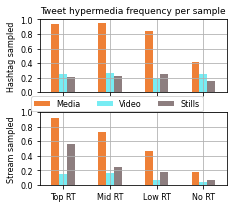

In [35]:
# Summary statistics        
cp_ptd=[(0.933,0.502,0.216),
         (0.467,0.925,0.953),
         (0.553,0.494,0.498),
         (0.792,0.318,0.969),]
#cp_ptd =[(0.933,0.502,0.216),(0.467,0.925,0.953),(0.886,0.298,0.153),(0.647,0.925,0.290),
#         (0.553,0.494,0.498),(0.145,0.175,0.208)] 
# Loop over Regions and visualize graphs side by side
regions = df['Sampling'].unique().tolist()
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=( 3.34646,3),tight_layout = True, sharex=False, sharey=True)

feats = ['Media','Video', 'Stills'] # ,'QT'
for region, ax in zip(regions, axes.ravel()):
    df.loc[df['Sampling'] == region,feats].plot(ax=ax, kind='bar',legend=False,color=cp_ptd)
    ax.set_ylabel(region + ' sampled',fontsize = 8)
    ax.set_ylim([0,1])
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_yticklabels(labels=[0.0,0.2,0.4,0.6,0.8,1.0],fontsize = 8)
    ax.grid()
axes[1].set_xticklabels(df.loc[df['Sampling'] == region,'RT Range'].values,rotation=0,fontsize = 8)  
axes[0].set_xticklabels([])
axes[0].set_title('Tweet hypermedia frequency per sample',fontsize = 9)
fig.legend(labels = feats, loc="center", ncol=7,fontsize = 8)
plt.savefig('./plots/figure6_Tweet_tech.jpg',bbox_inches = 'tight',dpi = 300)#eps',transparent=False, backend = 'PS',

# plt.tight_layout()
plt.show()

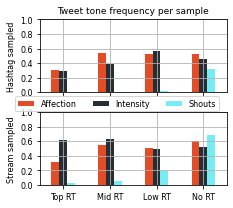

In [36]:
# Summary statistics        
cp_ptd =[(0.886,0.298,0.153),
         (0.145,0.175,0.208),
         (0.467,0.925,0.953)] 
# Loop over Regions and visualize graphs side by side
regions = df['Sampling'].unique().tolist()
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=( 3.34646,3),tight_layout = True, sharex=False, sharey=True)

feats = [ 'Affection', 'Intensity', 'Shouts']
for region, ax in zip(regions, axes.ravel()):
    df.loc[df['Sampling'] == region,feats].plot(ax=ax, kind='bar',legend=False,color=cp_ptd)
    ax.set_ylabel(region + ' sampled',fontsize = 8)
    ax.set_ylim([0,1])
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_yticklabels(labels=[0.0,0.2,0.4,0.6,0.8,1.0],fontsize = 8)
    ax.grid()
axes[1].set_xticklabels(df.loc[df['Sampling'] == region,'RT Range'].values,rotation=0,fontsize = 8)  
axes[0].set_xticklabels([])
axes[0].set_title('Tweet tone frequency per sample',fontsize = 9)
fig.legend(labels = feats, loc="center", ncol=7,fontsize = 8)
plt.savefig('./plots/figure7_Tweet_tone.jpg',bbox_inches = 'tight',dpi = 300)#eeps',transparent=False, backend = 'PS',dpi = 300)

# plt.tight_layout()
plt.show()

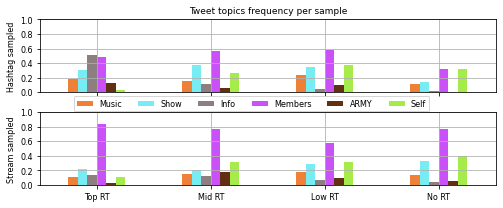

In [37]:
# Summary statistics        
cp_ptd =[(0.933,0.502,0.216),
         (0.467,0.925,0.953),
         (0.553,0.494,0.498),
         (0.792,0.318,0.969),
         (0.380,0.188,0.071),
         (0.647,0.925,0.290),] #(0.957,0.729,0.522),
# Loop over Regions and visualize graphs side by side
regions = df['Sampling'].unique().tolist()
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7.08661,3),tight_layout = True, sharex=False, sharey=True)

feats = ['Music','Show','Info','Members','ARMY','Self']
for region, ax in zip(regions, axes.ravel()):
    df.loc[df['Sampling'] == region,feats].plot(ax=ax, kind='bar',legend=False,color=cp_ptd)
    ax.set_ylabel(region + ' sampled',fontsize = 8)
    ax.set_ylim([0,1])
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_yticklabels(labels=[0.0,0.2,0.4,0.6,0.8,1.0],fontsize = 8)
    ax.grid()
axes[1].set_xticklabels(df.loc[df['Sampling'] == region,'RT Range'].values,rotation=0,fontsize = 8)  
axes[0].set_xticklabels([])
axes[0].set_title('Tweet topics frequency per sample',fontsize = 9)
fig.legend(labels = feats, loc="center", ncol=8,fontsize = 8)
plt.savefig('./plots/figure8_Tweet_content.jpg',bbox_inches = 'tight',dpi = 300)#eeps',transparent=False, backend = 'PS',dpi = 300)

plt.show()

In [38]:
cp_ptd =[(0.933,0.502,0.216),(0.957,0.729,0.522),(0.886,0.298,0.153),(0.467,0.925,0.953),(0.792,0.318,0.969),
        (0.647,0.925,0.290),(0.145,0.175,0.208),(0.941,0.714,0.247),(0.945,0.588,0.494),
        (0.553,0.494,0.498),(0.380,0.188,0.071),(0.941,0.926,0.886)]

# https://matplotlib.org/stable/tutorials/colors/colors.html

In [39]:
df = content_stats.copy()
df.columns

Index(['RT Range', 'Sampling', 'Concert', 'Concert_tag', 'Median RT', 'Max RT',
       'Min RT', 'Median favs', 'Median replys', 'Median OP Followers',
       'Median OP Statuses', 'Median OP Friends', 'Median length', 'Media',
       'Affection', 'Intensity', 'Shouts', 'Self', 'Members', 'Video',
       'Stills', 'Show', 'Music', 'ARMY', 'Anticipation', 'Info', 'Stream',
       'Commercial'],
      dtype='object')

In [40]:
df.loc[:,[ 'Sampling', 'Concert_tag','RT Range', 'Median RT', 'Max RT',
       'Min RT', 
       'Median favs', 'Median replys', 'Median OP Followers',
       'Median OP Statuses', 'Median OP Friends', 'Median length', 'Media']]
# 'Sample Prominence', 'Timeline Prominence','Population',

,Sampling,Concert_tag,RT Range,Median RT,Max RT,Min RT,Median favs,Median replys,Median OP Followers,Median OP Statuses,Median OP Friends,Median length,Media
SWZ Top RT,Hashtag,SWZ,Top RT,717.5,717.5,717.5,1306.0,9.0,5433.0,26921.5,195.5,171.5,0.940
SWZ Mid RT,Hashtag,SWZ,Mid RT,13.0,13.0,13.0,37.5,0.0,1199.0,13353.0,263.5,133.5,0.945
SWZ Low RT,Hashtag,SWZ,Low RT,1.0,1.0,1.0,2.0,0.0,321.5,10558.0,334.5,127.0,0.845
SWZ No RT,Hashtag,SWZ,No RT,0.0,0.0,0.0,0.0,0.0,185.0,7714.0,277.0,71.0,0.410
PTD Top RT,Stream,PTD,Top RT,8788.0,8788.0,8788.0,22938.5,59.5,192769.0,17792.5,100.0,61.5,0.920
PTD Mid RT,Stream,PTD,Mid RT,16.0,16.0,16.0,39.0,0.0,16539.0,32833.5,292.0,85.5,0.730
PTD Low RT,Stream,PTD,Low RT,1.0,1.0,1.0,3.0,0.0,2897.0,50551.5,598.0,77.5,0.460
PTD No RT,Stream,PTD,No RT,0.0,0.0,0.0,0.0,0.0,417.0,20693.0,493.0,37.5,0.170


In [41]:
print(df.loc[:,[ 'Sampling','RT Range', 'Median RT', 'Max RT',
       'Min RT', 'Median favs', 'Median length', 'Median OP Followers','Median OP Friends']].to_latex())
# 'Sample Prominence', 'Timeline Prominence',

\begin{tabular}{lllrrrrrrr}
\toprule
{} & Sampling & RT Range &  Median RT &  Max RT &  Min RT &  Median favs &  Median length &  Median OP Followers &  Median OP Friends \\
\midrule
SWZ Top RT &  Hashtag &   Top RT &      717.5 &   717.5 &   717.5 &       1306.0 &          171.5 &               5433.0 &              195.5 \\
SWZ Mid RT &  Hashtag &   Mid RT &       13.0 &    13.0 &    13.0 &         37.5 &          133.5 &               1199.0 &              263.5 \\
SWZ Low RT &  Hashtag &   Low RT &        1.0 &     1.0 &     1.0 &          2.0 &          127.0 &                321.5 &              334.5 \\
SWZ No RT  &  Hashtag &    No RT &        0.0 &     0.0 &     0.0 &          0.0 &           71.0 &                185.0 &              277.0 \\
PTD Top RT &   Stream &   Top RT &     8788.0 &  8788.0 &  8788.0 &      22938.5 &           61.5 &             192769.0 &              100.0 \\
PTD Mid RT &   Stream &   Mid RT &       16.0 &    16.0 &    16.0 &         39.0 &          

# Check Stream sample
Making sure the kpop streams are mostly about the concert stuff. I can't find the notebook where I did this before

In [43]:
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [45]:
Event_wise_stats = pd.DataFrame()
Segment_wise_stats = pd.DataFrame()
sr='60S'
sm='60S'


for setNo in [2,4,5]:
    cdets = Concerts.loc[setNo,:]
    print(cdets['Long_name'])
    these_twts = pd.read_csv(cdets['dep_loc'] + cdets['dep_twt_db'],index_col = 0)
    these_twts["created_at"] = pd.to_datetime(these_twts["created_at"])
    twt_rates = twt_red.tweet_rates(these_twts,sr,sm)
    if setNo == 2:
        parallel_twts = pd.DataFrame()
        parallel_twts[cdets['Long_name']] = twt_rates['All Tweet rate']
    else:
        parallel_twts.loc[:,cdets['Long_name']] = twt_rates['All Tweet rate'].values
    ct = twt_red.segment_rates(concert_times,these_twts,twt_rates)
    ct['sampling'] = cdets['sampling']
    ct['tag'] = cdets['tag']
    Event_wise_stats = pd.concat([Event_wise_stats,ct])


Permission to Dance on Stage
[Timestamp('2021-10-24 09:00:00+0000', tz='UTC'), Timestamp('2021-10-24 12:59:59+0000', tz='UTC')]
[228708, 214342, 5548]
Week prior to PTD On Stage
[Timestamp('2021-10-17 09:00:00+0000', tz='UTC'), Timestamp('2021-10-17 12:59:59+0000', tz='UTC')]
[14269, 12728, 204]
Week following PTD On Stage
[Timestamp('2021-10-31 09:00:00+0000', tz='UTC'), Timestamp('2021-10-31 12:59:59+0000', tz='UTC')]
[46790, 42672, 498]


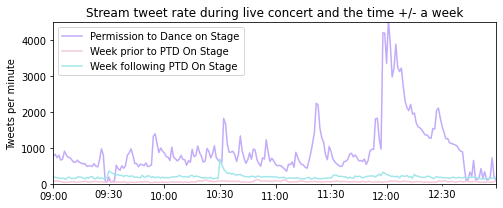

In [46]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(7.08661,3),tight_layout = True)

parallel_twts.plot(ax = axes)
axes.set_ylim([0,4500])
axes.set_title('Stream tweet rate during live concert and the time +/- a week')
axes.set_ylabel('Tweets per minute')

plt.savefig('./plots/figureA1_Stream_Rates.jpg',bbox_inches = 'tight',dpi = 300)#eeps',transparent=False, backend = 'PS',dpi = 300)

plt.show()